In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("BostonHousing.csv")

In [3]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


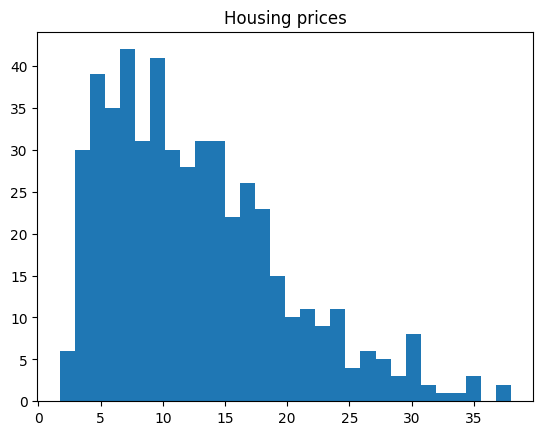

In [5]:
plt.hist(dataset['lstat'], bins = 30)
plt.title("Housing prices")
plt.show()

In [6]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))

In [10]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = 'mae')

In [11]:
hist = model.fit(X_train, y_train, epochs = 150, verbose = 1)

Epoch 1/150
12/12 [==============================] - 2s 5ms/step - loss: 556.8076 - mae: 21.6748
Epoch 2/150
12/12 [==============================] - 0s 4ms/step - loss: 452.8934 - mae: 19.0633
Epoch 3/150
12/12 [==============================] - 0s 4ms/step - loss: 318.2968 - mae: 15.4093
Epoch 4/150
12/12 [==============================] - 0s 3ms/step - loss: 171.9861 - mae: 10.7900
Epoch 5/150
12/12 [==============================] - 0s 6ms/step - loss: 75.3899 - mae: 6.8295
Epoch 6/150
12/12 [==============================] - 0s 5ms/step - loss: 44.9106 - mae: 5.1579
Epoch 7/150
12/12 [==============================] - 0s 5ms/step - loss: 35.2400 - mae: 4.4546
Epoch 8/150
12/12 [==============================] - 0s 4ms/step - loss: 28.8300 - mae: 3.9007
Epoch 9/150
12/12 [==============================] - 0s 3ms/step - loss: 24.5404 - mae: 3.7062
Epoch 10/150
12/12 [==============================] - 0s 3ms/step - loss: 23.7016 - mae: 3.4878
Epoch 11/150
12/12 [=====================

In [12]:
loss, mae = model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Mean Absolute Error: ", mae)

5/5 [==============================] - 0s 3ms/step - loss: 14.8645 - mae: 2.6686
Loss:  14.864459991455078
Mean Absolute Error:  2.668630361557007


In [13]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  3.855445497481408


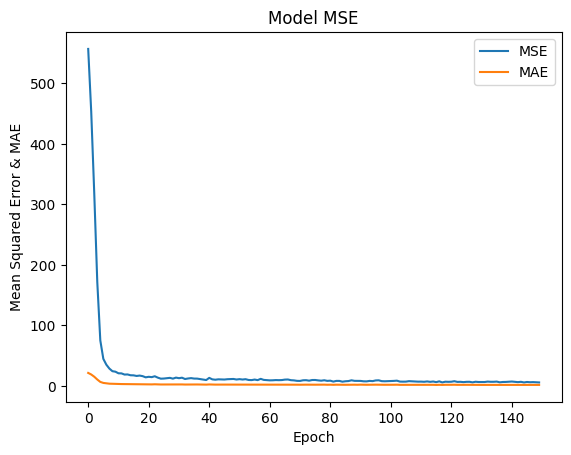

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['mae'])
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error & MAE')
plt.legend(['MSE','MAE'])
plt.show()